In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [4]:
fake_data=pd.read_csv("../input/fake-news-detection-dataset-english/Fake.csv/Fake.csv")
real_data=pd.read_csv("../input/fake-news-detection-dataset-english/True.csv/True.csv")

Data Analysis

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


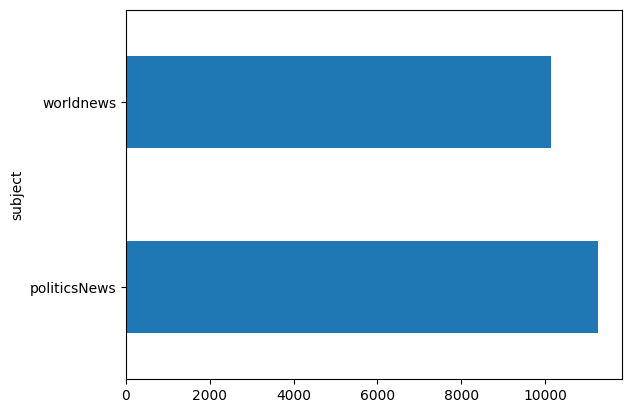

In [7]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

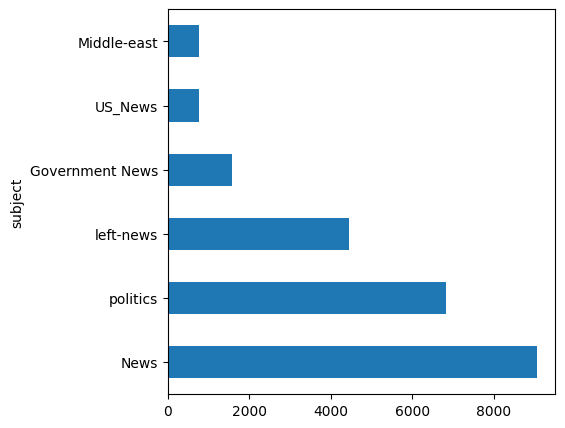

In [8]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [9]:
wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))

In [10]:
wordcld_text=" ".join(real_data["text"].tolist())

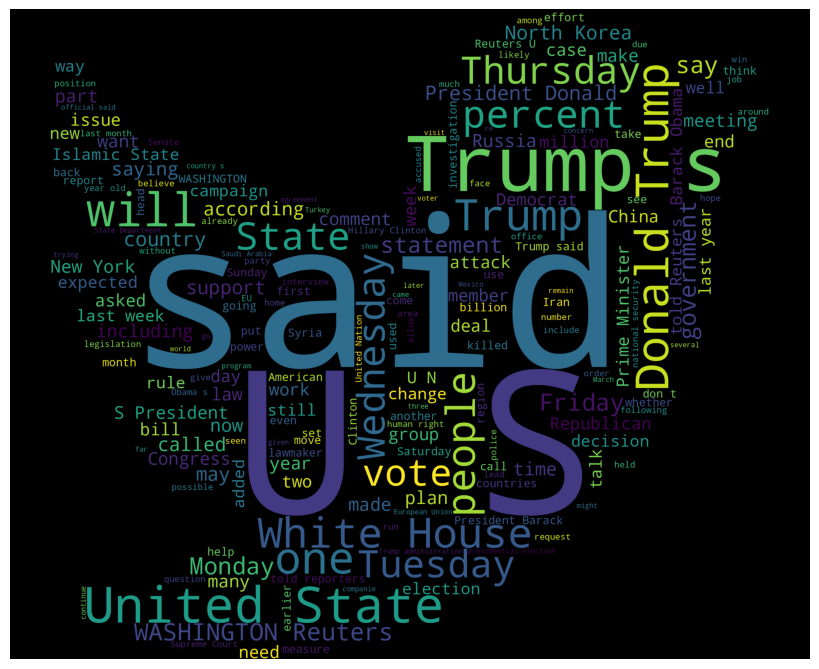

In [11]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud fake text data

In [12]:
fake_text=" ".join(fake_data["text"].tolist())

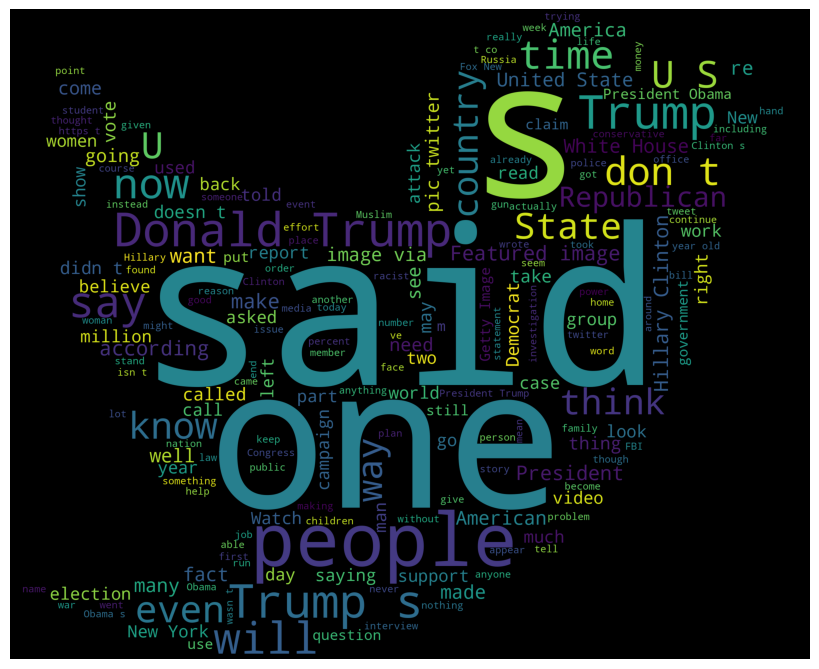

In [13]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
fake_data["label"]="fake"
real_data["label"]="real"

In [15]:
final_data= pd.concat([fake_data,real_data])

In [16]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [17]:
final_data.head(10)

,title,text,subject,date,label
0,FORMER OBAMA SPOKESLIAR To Join NBC As Paid Fa...,President Obama s White House press secretary ...,left-news,"Mar 27, 2017",fake
1,TRUMP BRINGS LOVE FOR AMERICA BACK TO DC! Pres...,,left-news,"Jan 19, 2017",fake
2,Trump Threatens To Ruin Protesters’ Lives In ...,"By now, everyone has heard of the violence and...",News,"March 12, 2016",fake
3,Anti-Trump protesters block Arizona road; marc...,(Reuters) - Demonstrators briefly shut down an...,politicsNews,"March 19, 2016",real
4,"Amsterdam mayor Van der Laan, who once snubbed...","AMSTERDAM (Reuters) - Eberhard van der Laan, A...",worldnews,"October 6, 2017",real
5,"SOPA False Flag? Alleged ‘Hack’ on Netflix, Tw...","Shawn Helton 21st Century WireYesterday, a wav...",US_News,"October 22, 2016",fake
6,U.S. EPA employees protest Trump's pick to run...,WASHINGTON (Reuters) - Former and current empl...,politicsNews,"February 6, 2017",real
7,Belgian judge defers ruling on warrant for ex-...,BRUSSELS (Reuters) - A Belgian judge made no r...,worldnews,"November 17, 2017",real
8,Iraq Shi'ite paramilitary calls for ban on U.S...,BAGHDAD (Reuters) - Iraq’s Popular Mobilizatio...,politicsNews,"January 29, 2017",real
9,Maddow: It’s ‘A Farce’ To Pretend The GOP Doe...,Rachel Maddow is angry with her fellow members...,News,"April 1, 2016",fake


In [18]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [19]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,FORMER OBAMA SPOKESLIAR To Join NBC As Paid Fa...,President Obama s White House press secretary ...,fake
1,TRUMP BRINGS LOVE FOR AMERICA BACK TO DC! Pres...,,fake
2,Trump Threatens To Ruin Protesters’ Lives In ...,"By now, everyone has heard of the violence and...",fake
3,Anti-Trump protesters block Arizona road; marc...,(Reuters) - Demonstrators briefly shut down an...,real
4,"Amsterdam mayor Van der Laan, who once snubbed...","AMSTERDAM (Reuters) - Eberhard van der Laan, A...",real
...,...,...,...
44893,Trump officials under fire over vague tax prop...,WASHINGTON (Reuters) - Missing from President ...,real
44894,Honduran presidential result due at 9 pm: elec...,TEGUCIGALPA (Reuters) - Honduras will publish ...,real
44895,Sessions confirmed as U.S. attorney general af...,WASHINGTON (Reuters) - A bitterly divided U.S....,real
44896,EU's Mogherini says EU-U.S. ties deeper than a...,BRUSSELS (Reuters) - EU foreign policy chief F...,real


In [20]:
final_data.head()

,title,text,subject,date,label
0,FORMER OBAMA SPOKESLIAR To Join NBC As Paid Fa...,President Obama s White House press secretary ...,left-news,"Mar 27, 2017",fake
1,TRUMP BRINGS LOVE FOR AMERICA BACK TO DC! Pres...,,left-news,"Jan 19, 2017",fake
2,Trump Threatens To Ruin Protesters’ Lives In ...,"By now, everyone has heard of the violence and...",News,"March 12, 2016",fake
3,Anti-Trump protesters block Arizona road; marc...,(Reuters) - Demonstrators briefly shut down an...,politicsNews,"March 19, 2016",real
4,"Amsterdam mayor Van der Laan, who once snubbed...","AMSTERDAM (Reuters) - Eberhard van der Laan, A...",worldnews,"October 6, 2017",real


In [21]:
final_data.label.value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

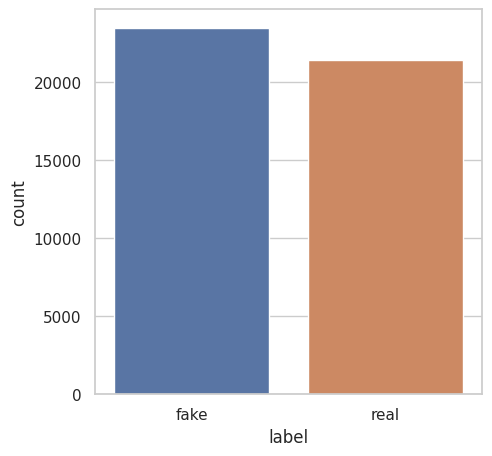

In [22]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [23]:
final_data.head(5)

,title,text,subject,date,label
0,FORMER OBAMA SPOKESLIAR To Join NBC As Paid Fa...,President Obama s White House press secretary ...,left-news,"Mar 27, 2017",fake
1,TRUMP BRINGS LOVE FOR AMERICA BACK TO DC! Pres...,,left-news,"Jan 19, 2017",fake
2,Trump Threatens To Ruin Protesters’ Lives In ...,"By now, everyone has heard of the violence and...",News,"March 12, 2016",fake
3,Anti-Trump protesters block Arizona road; marc...,(Reuters) - Demonstrators briefly shut down an...,politicsNews,"March 19, 2016",real
4,"Amsterdam mayor Van der Laan, who once snubbed...","AMSTERDAM (Reuters) - Eberhard van der Laan, A...",worldnews,"October 6, 2017",real


In [24]:
final_data["text"]=final_data["title"]+final_data["text"]

In [25]:
final_data=final_data[["text","label"]]

In [26]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [27]:
final_data.sample(5)

,text,label
37136,Activist Trolls Republicans For Their Phony C...,0
26,Mexico women protest violence in skeletal Day ...,1
26421,Obama rallies Obamacare troops at 'critical ti...,1
16434,U.S. says identified target for sanctions over...,1
18654,"FBI holding back information on Russia probes,...",1


In [28]:
final_data.label[9943]

0

In [29]:
final_data.text[36709]

'U.S waives Jones Act to secure fuel for hurricane respondersWASHINGTON (Reuters) - The U.S. government on Friday said it was temporarily waiving a law that limits the availability of cargoes on the U.S. coasts, a step that will ensure enough fuel reaches emergency responders during Hurricane Irma and in the wake of Hurricane Harvey.  The Jones Act mandates the use of U.S.-flagged vessels to transport merchandise between U.S. coasts. The Department of Homeland Security waived the requirement for one week. This will allow oil and gas operators to use often cheaper, tax-free, or more readily available foreign-flagged vessels. Harvey, which hit Texas with record floods, had a wider effect of disrupting fuel distribution across Florida, Georgia and other Southeastern states by shutting refineries and pipelines.  With Hurricane Irma, one of the most powerful Atlantic storms in a century, expected to hit Florida in days, the region will experience “one of the largest mass evacuations in Amer

In [30]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [31]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [33]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [35]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [36]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [37]:
maxlen=100

create bert model

In [38]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    
    

In [39]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 100, 7                                           
                             68),                                                             

In [40]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [42]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10
958/958 [==============================] - 461s 429ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 2/10
958/958 [==============================] - 385s 402ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 3/10
958/958 [==============================] - 385s 402ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 4/10
958/958 [==============================] - 383s 399ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 5/10
958/958 [==============================] - 383s 399ms/step - loss: 3.7872e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 6/10
958/958 [==============================] - 383s 399ms/step - loss: 1.5708e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9996
Epoch 7/10
958/958 [==============================] - 382s 399ms/step - loss: 1.2841e-04 - accuracy: 1.0000 - val_lo

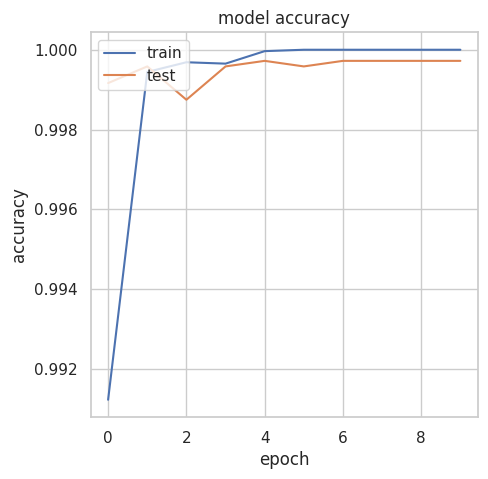

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

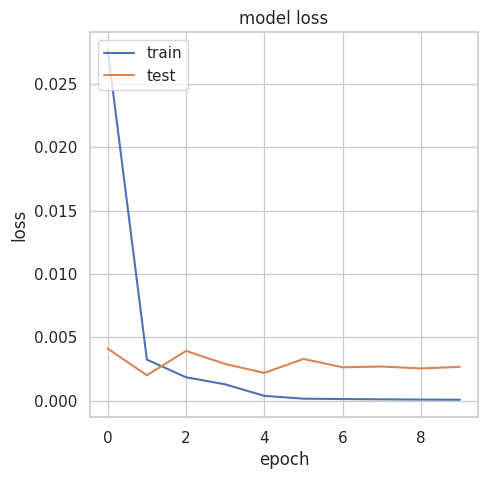

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 40s 130ms/step


Confusion matrix

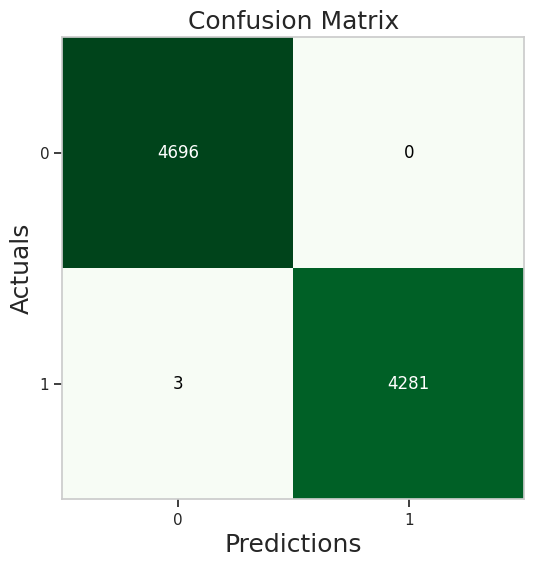

In [46]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Custom data prediction

In [48]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [49]:
test_token = tokenize(test_text)

In [50]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

69/69 [==============================] - 9s 131ms/step


In [51]:
test_text_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
